In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Reload libraries automatically
%load_ext autoreload
%autoreload 2

# Plot in the notebook
%matplotlib inline

In [2]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from pprint import pprint
import _pickle as pickle

import time

In [4]:
# My libraries
import lib.simulated_annealing.sim_ann as sa
import lib.model.model as model

## Perform simulated annealing.

Change the values for min and max temperature and alpha in the file sim_ann.py. 

In [8]:
t0 = time.time()
parameters, cost_hist, parameters_hist = sa.parameter_tuning(root_folder="../")
t1 = time.time()
total = t1-t0
print('Total time spent: ', total)

Temp:  1.0
Lower!
Lower!
Lower!
Lower!
Lower!
accepted!
Lower!
Lower!
accepted!
accepted!
Lower!
Lower!
Lower!
Lower!
Lower!
Lower!
Lower!
Lower!
Lower!
Lower!
Lower!
Lower!
Lower!
{'arousal': [0.8802316207207594, 2.0006941495924906],
 'attention_1': [2.83939973523512, 1.8930000478575375],
 'attention_2': [0.4888396462152728, 5.197889841776613],
 'ff_ent': [1.3816826641481574, 2.072010537496103],
 'ff_is': [2.0956083672176598, 4.127814682069269],
 'ff_ko': [1.4273309453353284, 2.1505484638482923],
 'ff_se': [2.7408271644871847, 1.8878058151038548],
 'ff_si': [1.4501472169174319, 4.093606148570937],
 'mood': [1.4155395800541697, 1.7839988174899355],
 'mood_speed': 0.002455224839389256,
 'prep_comm': [3.543891351248492, 1.8192288587953582],
 'prep_gen': [2.486077048400365, 2.051760249920281],
 'prep_like': [2.818477431353213, 2.1128952294259853],
 'prep_share': [2.13042768072991, 2.9971655723018],
 'satisfaction': [0.9698677519128538, 5.009194042792503],
 'srs_sal': [0.6696355517672399, 

Lower!
Lower!
Lower!
Lower!
Lower!
Lower!
Lower!
Lower!
Lower!
Lower!
Lower!
Lower!
{'arousal': [0.8074279083719061, 2.404537483262864],
 'attention_1': [2.7898079522897175, 1.881967779164354],
 'attention_2': [0.5091211798115566, 5.128143086348725],
 'ff_ent': [1.2664515905800697, 2.0949839571593056],
 'ff_is': [1.9149960035379419, 4.076813789549822],
 'ff_ko': [1.4292536371264932, 1.9721238572142785],
 'ff_se': [2.649505560475991, 1.0040552497308892],
 'ff_si': [1.475784200856313, 3.753786265932868],
 'mood': [1.2588360058840715, 1.113615170860759],
 'mood_speed': 0.0001,
 'prep_comm': [3.405541929212479, 2.3334168214672486],
 'prep_gen': [2.679098054416953, 2.102444738833074],
 'prep_like': [2.861812854290677, 2.254284579285529],
 'prep_share': [2.1739560440260735, 3.240290429109576],
 'satisfaction': [0.900959080151336, 4.635083618047818],
 'srs_sal': [0.7253240841903924, 2.3521018228059134]}
2679.332015161901
Temp:  0.028247524899999984
Lower!
Lower!
Lower!
Lower!
Lower!
Lower!
Lo

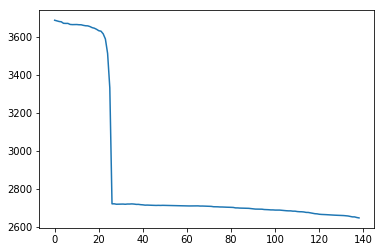

In [9]:
plt.plot(cost_hist)

## Dumping the simulated annealing results

In [ ]:
with open('pickle/parameters.txt', 'wb') as fp:
    pickle.dump(parameters, fp)

with open('pickle/cost_hist.txt', 'wb') as fp:
    pickle.dump(cost_hist, fp)

with open('pickle/parameters_hist.txt', 'wb') as fp:
    pickle.dump(parameters_hist, fp)
    

## Loading simulated annealing results

with open ('pickle/parameters.txt', 'rb') as fp:
    parameters = pickle.load(fp)

with open ('pickle/cost_hist.txt', 'rb') as fp:
    cost_hist = pickle.load(fp)

with open ('pickle/parameters_hist.txt', 'rb') as fp:
    parameters_hist = pickle.load(fp)

## Process results

In [10]:
#steepness values from 0.5 (for four arrows), 0.7 (for three arrows),  1 (for two arrows) to 2.5 (for 1 arrow)
a = parameters_hist[-1]

In [11]:
a

{'srs_sal': [0.7445146262289166, 2.550380661158188],
 'arousal': [0.7829427003192834, 2.5497768155265317],
 'attention_1': [2.7746401670483953, 2.261771292878544],
 'attention_2': [0.47974727625438196, 5.210268033096645],
 'mood': [1.1634771644215895, 1.3630423264835958],
 'ff_ko': [1.3580305971535247, 2.0909231445986123],
 'ff_ent': [1.2787569525332299, 2.074668425313663],
 'ff_si': [1.535070533967811, 3.566181995553979],
 'ff_is': [1.8357102764841402, 3.917958549340578],
 'ff_se': [2.6327374428456034, 1.079839928794592],
 'satisfaction': [0.8494649740694286, 4.723950486132158],
 'prep_like': [2.8807762728503805, 2.202745474734083],
 'prep_comm': [3.4029929348860506, 2.1862205172535476],
 'prep_share': [2.199692835445758, 3.388928727549916],
 'mood_speed': 0.0001,
 'prep_gen': [2.666706234322539, 2.079315903309141]}

In [14]:
new_cost = sa.get_error(a, root_folder="../")

In [15]:
new_cost

(2645.780978787983,
 {'srs_sal': [0.7445146262289166, 2.550380661158188],
  'arousal': [0.7829427003192834, 2.5497768155265317],
  'attention_1': [2.7746401670483953, 2.261771292878544],
  'attention_2': [0.47974727625438196, 5.210268033096645],
  'mood': [1.1634771644215895, 1.3630423264835958],
  'ff_ko': [1.3580305971535247, 2.0909231445986123],
  'ff_ent': [1.2787569525332299, 2.074668425313663],
  'ff_si': [1.535070533967811, 3.566181995553979],
  'ff_is': [1.8357102764841402, 3.917958549340578],
  'ff_se': [2.6327374428456034, 1.079839928794592],
  'satisfaction': [0.8494649740694286, 4.723950486132158],
  'prep_like': [2.8807762728503805, 2.202745474734083],
  'prep_comm': [3.4029929348860506, 2.1862205172535476],
  'prep_share': [2.199692835445758, 3.388928727549916],
  'mood_speed': 0.0001,
  'prep_gen': [2.666706234322539, 2.079315903309141]},
           mood      like     share   comment
 19    0.499521  0.004803  0.003851  0.001609
 39    0.499110  0.004802  0.003850  0.001

In [23]:
mood = 0.5

# Get the traits for the agents
validation_f = '../data/validation/'
root_folder = "../"

agents = model.get_agents(root_folder=root_folder) 
    
agent1 = agents['1']
agent2 = agents['2']
agent3 = agents['3']

# Get validation data set
data_a1 = pd.read_csv(validation_f+'validation_agent_1.csv')
data_a2 = pd.read_csv(validation_f+'validation_agent_2.csv')
data_a3 = pd.read_csv(validation_f+'validation_agent_3.csv')

messages1 = data_a1[[   'cat_per', 'cat_ent', 'cat_new', 'cat_edu', 
                            'cat_con', 'msg_rel', 'msg_qua', 'msg_sen', 
                            'msg_sal', 'msg_med', 'msg_com', 'msg_que'
                    ]]
messages2 = data_a2[[   'cat_per', 'cat_ent', 'cat_new', 'cat_edu', 
                        'cat_con', 'msg_rel', 'msg_qua', 'msg_sen', 
                        'msg_sal', 'msg_med', 'msg_com', 'msg_que'
                    ]]
messages3 = data_a3[[   'cat_per', 'cat_ent', 'cat_new', 'cat_edu', 
                        'cat_con', 'msg_rel', 'msg_qua', 'msg_sen', 
                        'msg_sal', 'msg_med', 'msg_com', 'msg_que'
                    ]]

reactions1 = data_a1[['mood', 'like', 'comment', 'share']]
reactions2 = data_a2[['mood', 'like', 'comment', 'share']]
reactions3 = data_a3[['mood', 'like', 'comment', 'share']]

# Agent 1

In [26]:
inputsDF, parameters = model.run_message_sequence(messages1, agent1,parameters, 'nb1', root_folder=root_folder)

In [27]:
parameters

{'srs_sal': [0.7445146262289166, 2.550380661158188],
 'arousal': [0.7829427003192834, 2.5497768155265317],
 'attention_1': [2.7746401670483953, 2.261771292878544],
 'attention_2': [0.47974727625438196, 5.210268033096645],
 'mood': [1.1634771644215895, 1.3630423264835958],
 'ff_ko': [1.3580305971535247, 2.0909231445986123],
 'ff_ent': [1.2787569525332299, 2.074668425313663],
 'ff_si': [1.535070533967811, 3.566181995553979],
 'ff_is': [1.8357102764841402, 3.917958549340578],
 'ff_se': [2.6327374428456034, 1.079839928794592],
 'satisfaction': [0.8494649740694286, 4.723950486132158],
 'prep_like': [2.8807762728503805, 2.202745474734083],
 'prep_comm': [3.4029929348860506, 2.1862205172535476],
 'prep_share': [2.199692835445758, 3.388928727549916],
 'mood_speed': 0.0001,
 'prep_gen': [2.666706234322539, 2.079315903309141]}

## Inputs

### Message Categories

Text(0.5, 0, 'Time step')

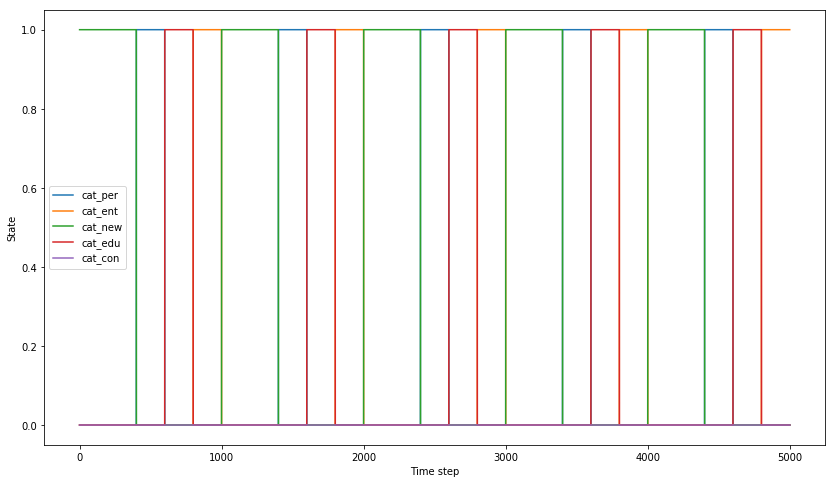

In [28]:
inputsDF[['cat_per', 'cat_ent', 'cat_new', 'cat_edu', 'cat_con']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Message characteristics

Text(0.5, 0, 'Time step')

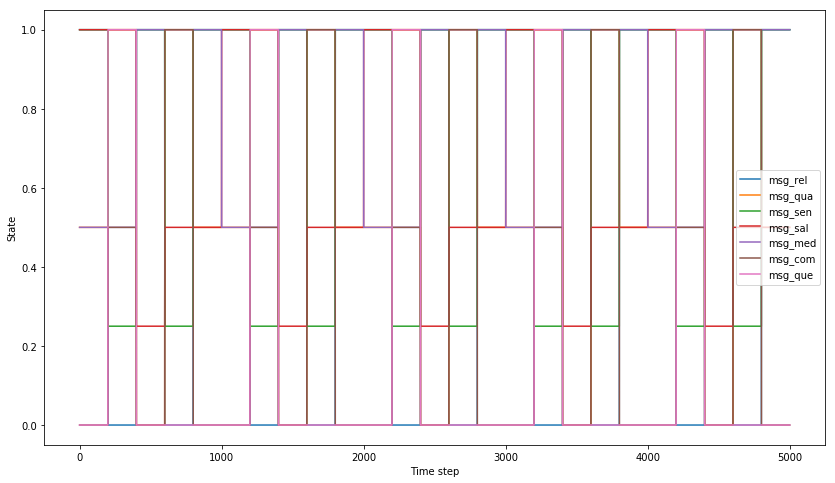

In [29]:
inputsDF[['msg_rel', 'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Sensory states

Text(0.5, 0, 'Time step')

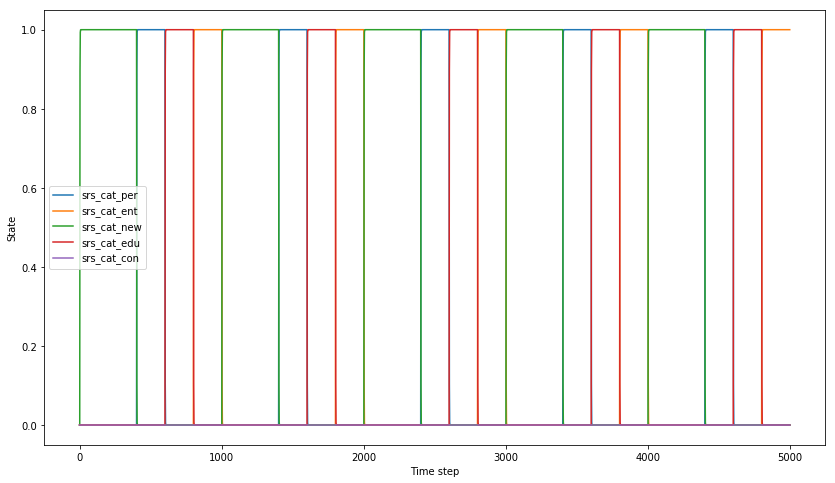

In [30]:
inputsDF[['srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu', 'srs_cat_con']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Arousal, attention

Text(0.5, 0, 'Time step')

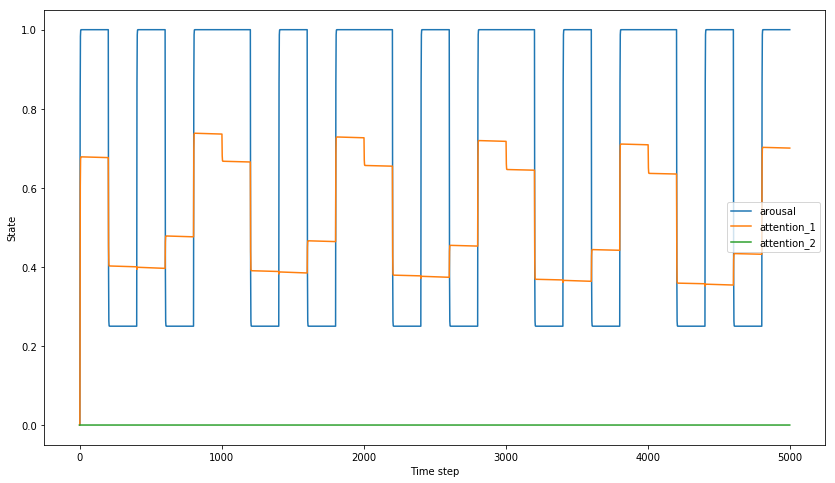

In [31]:
inputsDF[['arousal', 'attention_1', 'attention_2']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### FFs

Text(0.5, 0, 'Time step')

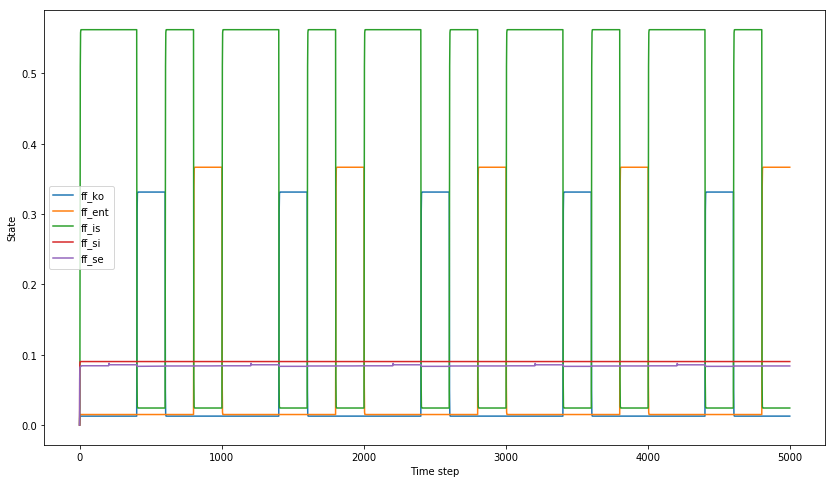

In [32]:
inputsDF[['ff_ko', 'ff_ent', 'ff_is', 'ff_si', 'ff_se']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Satisfaction

Text(0.5, 0, 'Time step')

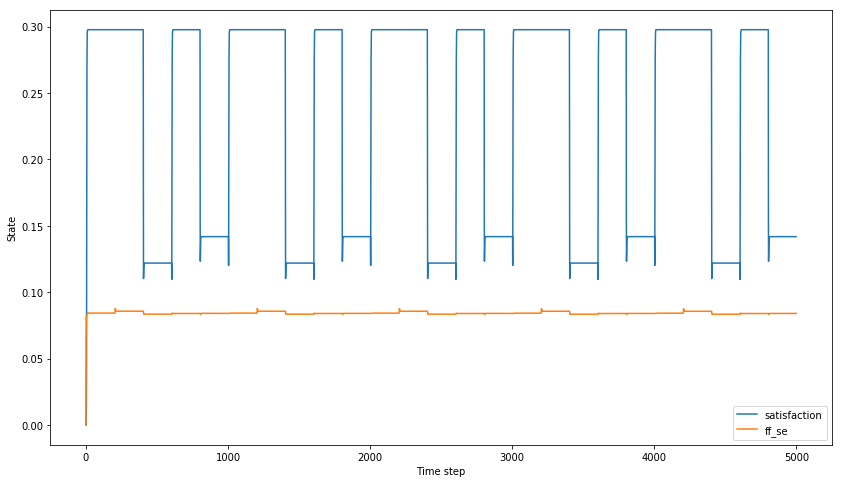

In [33]:
inputsDF[['satisfaction', 'ff_se']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### preps and ssr's

Text(0.5, 0, 'Time step')

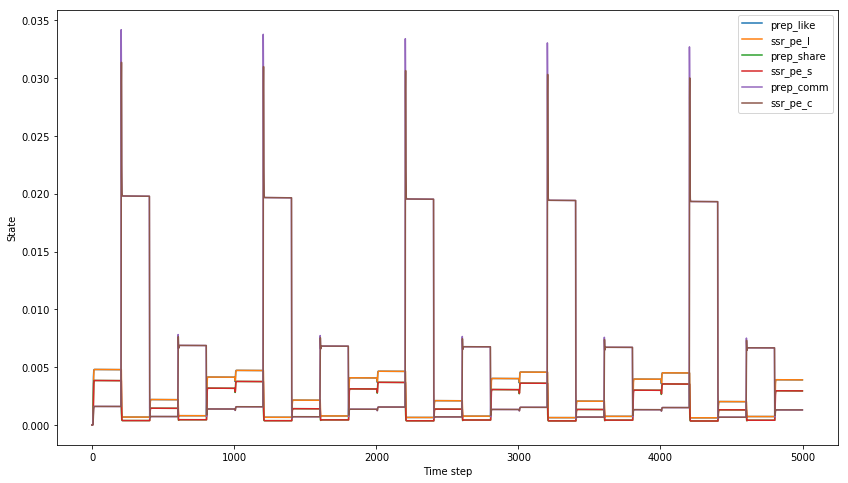

In [34]:
inputsDF[['prep_like', 'ssr_pe_l', 'prep_share', 'ssr_pe_s', 'prep_comm', 'ssr_pe_c']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Outputs

Text(0.5, 0, 'Time step')

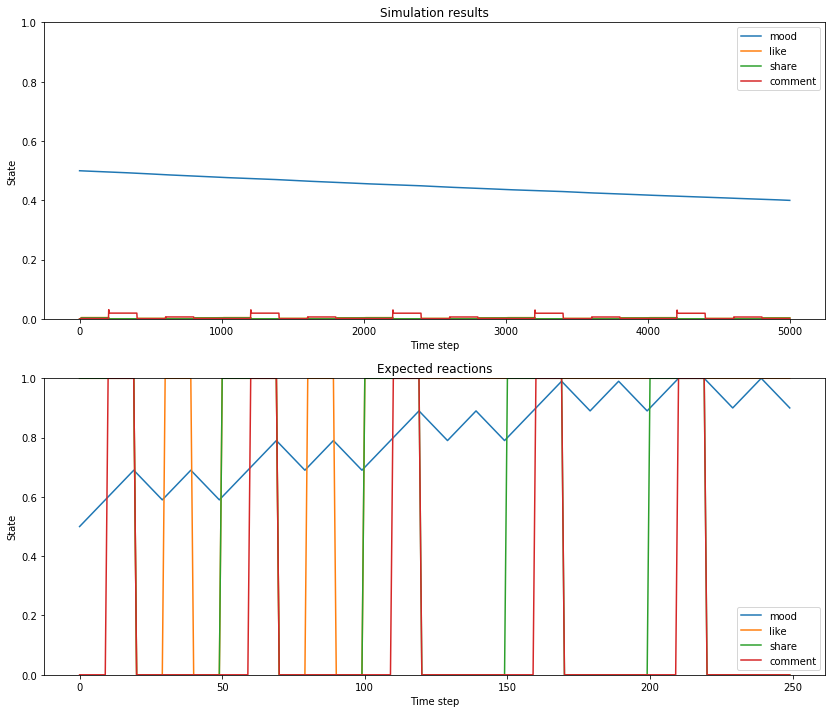

In [35]:
fig = plt.figure(figsize=((14,12)))

ax1 = fig.add_subplot(211)
inputsDF[['mood', 'like', 'share', 'comment']].plot(ax=ax1, title='Simulation results')
plt.ylabel('State')
plt.xlabel('Time step')
plt.ylim(0,1)

ax2 = fig.add_subplot(212)
reactions1[['mood', 'like', 'share', 'comment']].plot(ax=ax2, title='Expected reactions')
plt.ylim(0,1)
plt.ylabel('State')
plt.xlabel('Time step')

#plt.rcParams["figure.figsize"] = (15,8)

In [36]:
inputsDF.columns

Index(['cat_per', 'cat_ent', 'cat_new', 'cat_edu', 'cat_con', 'msg_rel',
       'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que',
       'nf_ko', 'nf_ent', 'nf_is', 'nf_si', 'nf_se', 'pt_cons', 'ss_cat_per',
       'ss_cat_ent', 'ss_cat_new', 'ss_cat_edu', 'ss_cat_con', 'ss_rel',
       'ss_qua', 'ss_sen', 'ss_sal', 'ss_med', 'ss_com', 'ss_que',
       'srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu',
       'srs_cat_con', 'srs_rel', 'srs_qua', 'srs_sen', 'srs_sal', 'srs_med',
       'srs_com', 'srs_que', 'arousal', 'attention_1', 'attention_2', 'mood',
       'ff_ko', 'ff_ent', 'ff_si', 'ff_is', 'ff_se', 'satisfaction',
       'prep_gen', 'prep_like', 'prep_comm', 'prep_share', 'ssr_pe_l',
       'ssr_pe_c', 'ssr_pe_s', 'like', 'comment', 'share'],
      dtype='object')

# Agent 2

In [37]:
inputsDF, parameters = model.run_message_sequence(messages2, agent2, parameters, 'nb3', root_folder=root_folder)

In [38]:
parameters

{'srs_sal': [0.7445146262289166, 2.550380661158188],
 'arousal': [0.7829427003192834, 2.5497768155265317],
 'attention_1': [2.7746401670483953, 2.261771292878544],
 'attention_2': [0.47974727625438196, 5.210268033096645],
 'mood': [1.1634771644215895, 1.3630423264835958],
 'ff_ko': [1.3580305971535247, 2.0909231445986123],
 'ff_ent': [1.2787569525332299, 2.074668425313663],
 'ff_si': [1.535070533967811, 3.566181995553979],
 'ff_is': [1.8357102764841402, 3.917958549340578],
 'ff_se': [2.6327374428456034, 1.079839928794592],
 'satisfaction': [0.8494649740694286, 4.723950486132158],
 'prep_like': [2.8807762728503805, 2.202745474734083],
 'prep_comm': [3.4029929348860506, 2.1862205172535476],
 'prep_share': [2.199692835445758, 3.388928727549916],
 'mood_speed': 0.0001,
 'prep_gen': [2.666706234322539, 2.079315903309141]}

## Inputs

### Message Categories

Text(0.5, 0, 'Time step')

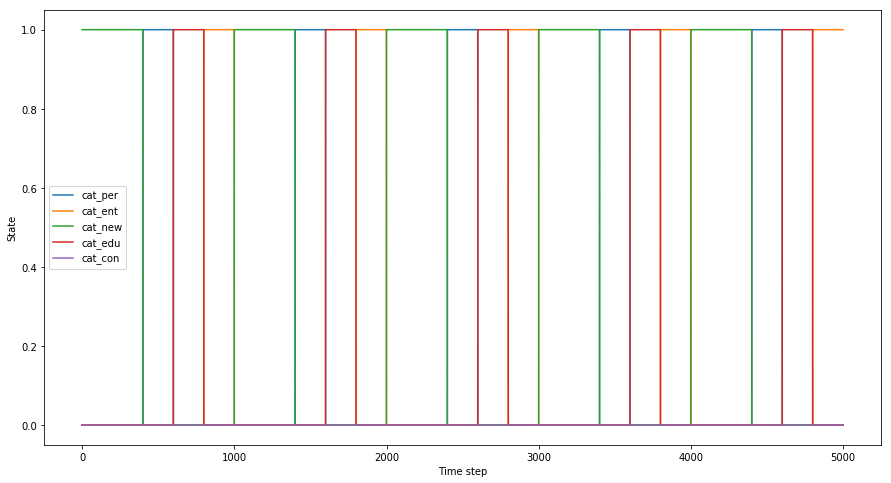

In [41]:
inputsDF[['cat_per', 'cat_ent', 'cat_new', 'cat_edu', 'cat_con']].plot(figsize=((15,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Message characteristics

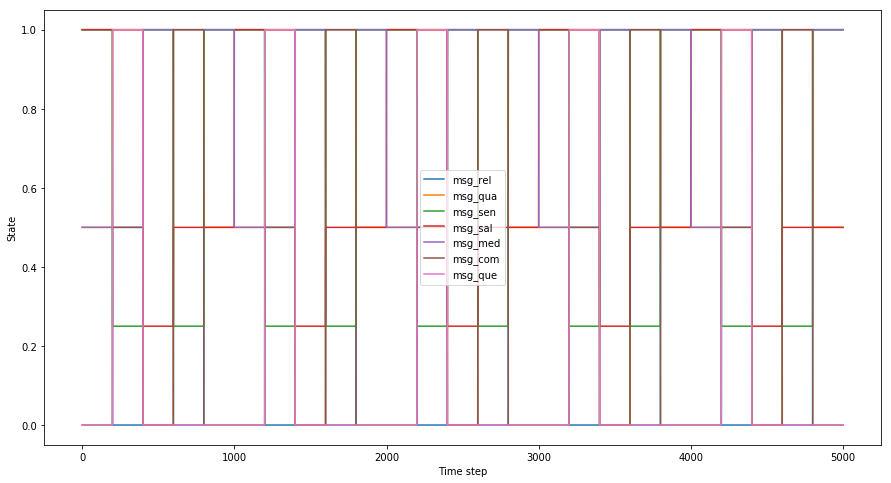

In [42]:
inputsDF[['msg_rel', 'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que']].plot(figsize=((15,8)))
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Sensory states

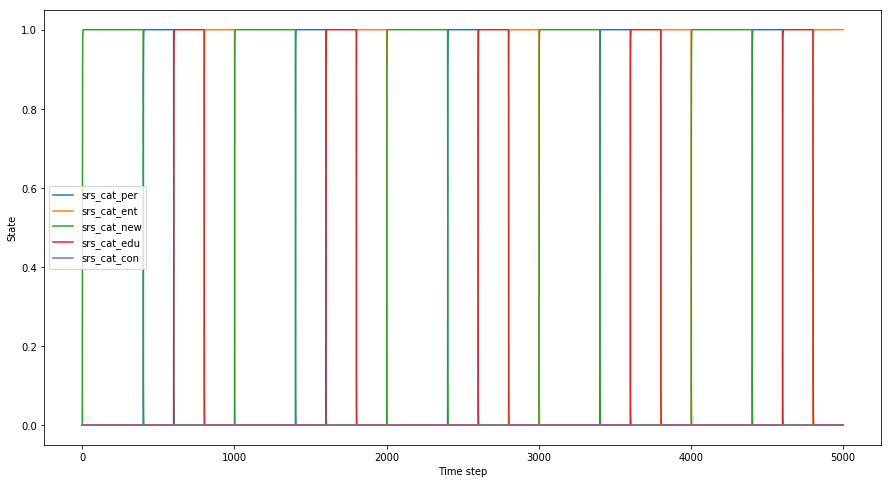

In [43]:
inputsDF[['srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu', 'srs_cat_con']].plot(figsize=((15,8)))
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Arousal, attention

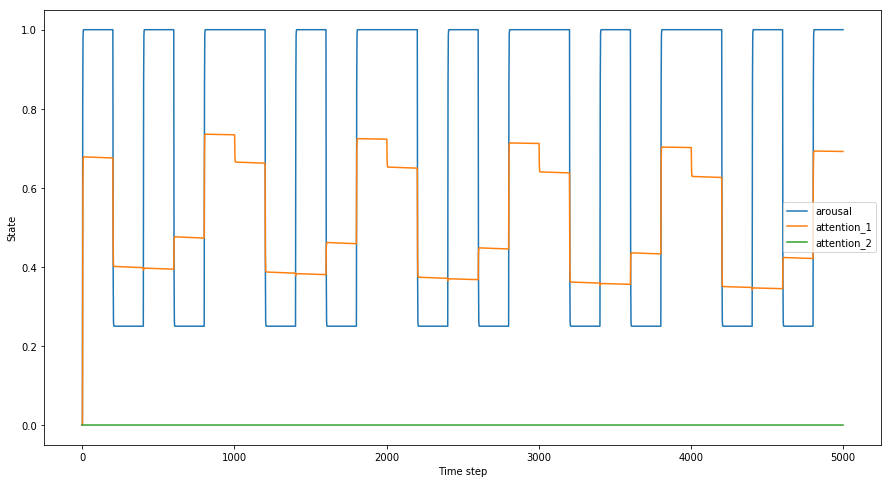

In [44]:
inputsDF[['arousal', 'attention_1', 'attention_2']].plot(figsize=((15,8)))
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### FFs

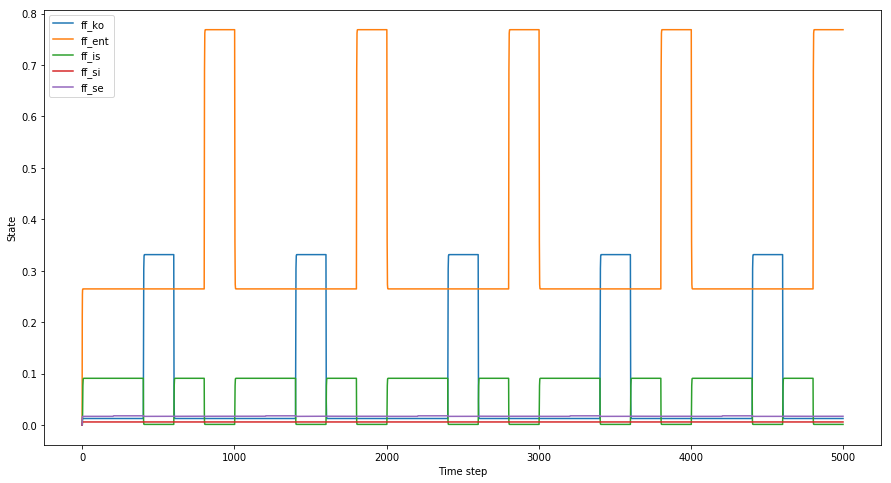

In [45]:
inputsDF[['ff_ko', 'ff_ent', 'ff_is', 'ff_si', 'ff_se']].plot(figsize=((15,8)))
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Satisfaction, dissatisfaction

Text(0.5, 0, 'Time step')

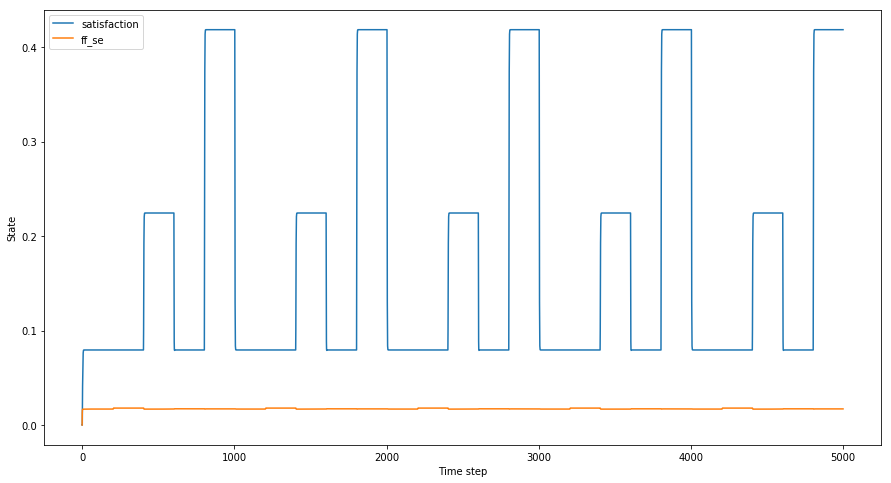

In [47]:
inputsDF[['satisfaction', 'ff_se']].plot(figsize=((15,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### preps and ssr's

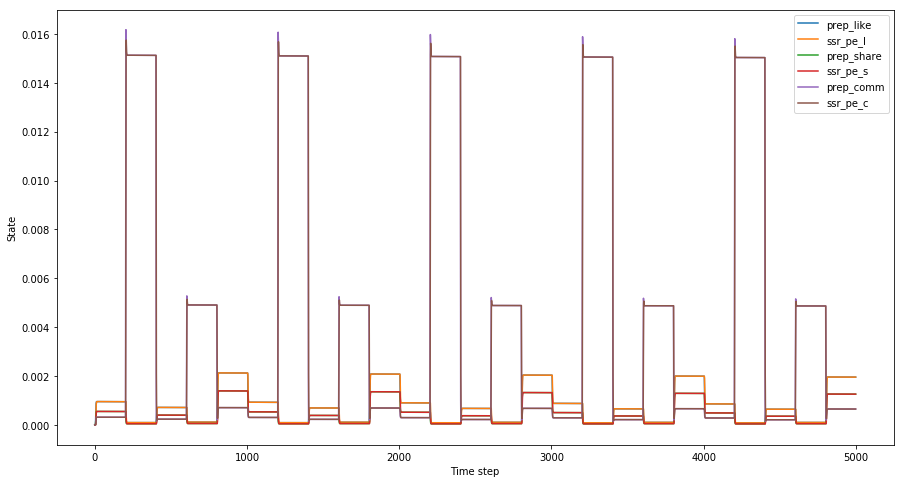

In [48]:
inputsDF[['prep_like', 'ssr_pe_l', 'prep_share', 'ssr_pe_s', 'prep_comm', 'ssr_pe_c']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Outputs

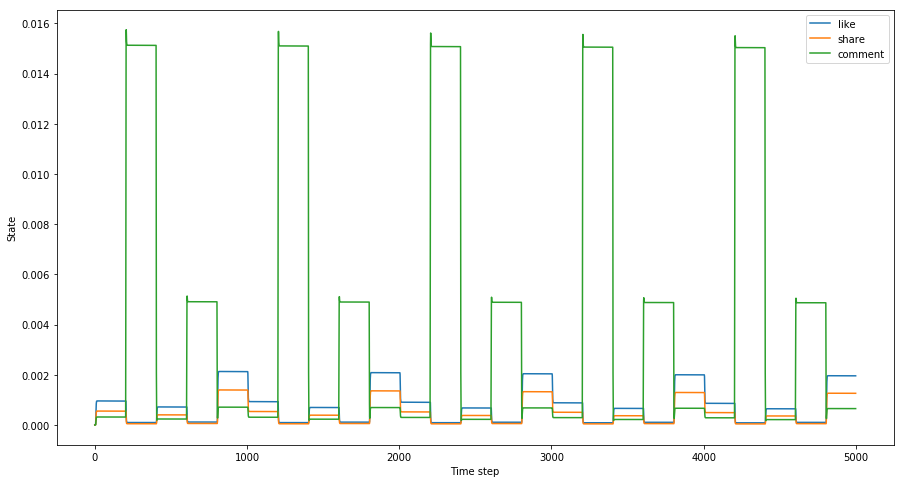

In [49]:
inputsDF[['like', 'share', 'comment']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Expected reactions

Text(0.5, 0, 'Time step')

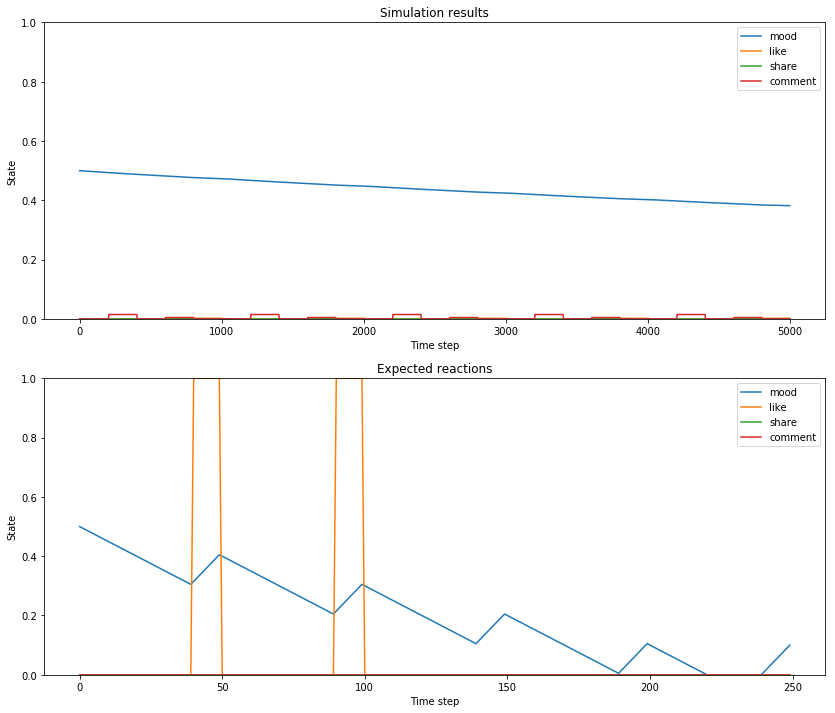

In [53]:
fig = plt.figure(figsize=((14,12)))

ax1 = fig.add_subplot(211)
inputsDF[['mood', 'like', 'share', 'comment']].plot(ax=ax1, title='Simulation results')
plt.ylabel('State')
plt.xlabel('Time step')
plt.ylim(0,1)

ax2 = fig.add_subplot(212)
reactions2[['mood', 'like', 'share', 'comment']].plot(ax=ax2, title='Expected reactions')
plt.ylim(0,1)
plt.ylabel('State')
plt.xlabel('Time step')

In [51]:
inputsDF.columns

Index(['cat_per', 'cat_ent', 'cat_new', 'cat_edu', 'cat_con', 'msg_rel',
       'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que',
       'nf_ko', 'nf_ent', 'nf_is', 'nf_si', 'nf_se', 'pt_cons', 'ss_cat_per',
       'ss_cat_ent', 'ss_cat_new', 'ss_cat_edu', 'ss_cat_con', 'ss_rel',
       'ss_qua', 'ss_sen', 'ss_sal', 'ss_med', 'ss_com', 'ss_que',
       'srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu',
       'srs_cat_con', 'srs_rel', 'srs_qua', 'srs_sen', 'srs_sal', 'srs_med',
       'srs_com', 'srs_que', 'arousal', 'attention_1', 'attention_2', 'mood',
       'ff_ko', 'ff_ent', 'ff_si', 'ff_is', 'ff_se', 'satisfaction',
       'prep_gen', 'prep_like', 'prep_comm', 'prep_share', 'ssr_pe_l',
       'ssr_pe_c', 'ssr_pe_s', 'like', 'comment', 'share'],
      dtype='object')

# Agent 3

In [54]:
inputsDF, parameters = model.run_message_sequence(messages3, agent3, parameters, 'nb3', root_folder=root_folder)

In [55]:
parameters

{'srs_sal': [0.7445146262289166, 2.550380661158188],
 'arousal': [0.7829427003192834, 2.5497768155265317],
 'attention_1': [2.7746401670483953, 2.261771292878544],
 'attention_2': [0.47974727625438196, 5.210268033096645],
 'mood': [1.1634771644215895, 1.3630423264835958],
 'ff_ko': [1.3580305971535247, 2.0909231445986123],
 'ff_ent': [1.2787569525332299, 2.074668425313663],
 'ff_si': [1.535070533967811, 3.566181995553979],
 'ff_is': [1.8357102764841402, 3.917958549340578],
 'ff_se': [2.6327374428456034, 1.079839928794592],
 'satisfaction': [0.8494649740694286, 4.723950486132158],
 'prep_like': [2.8807762728503805, 2.202745474734083],
 'prep_comm': [3.4029929348860506, 2.1862205172535476],
 'prep_share': [2.199692835445758, 3.388928727549916],
 'mood_speed': 0.0001,
 'prep_gen': [2.666706234322539, 2.079315903309141]}

## Inputs

### Message Categories

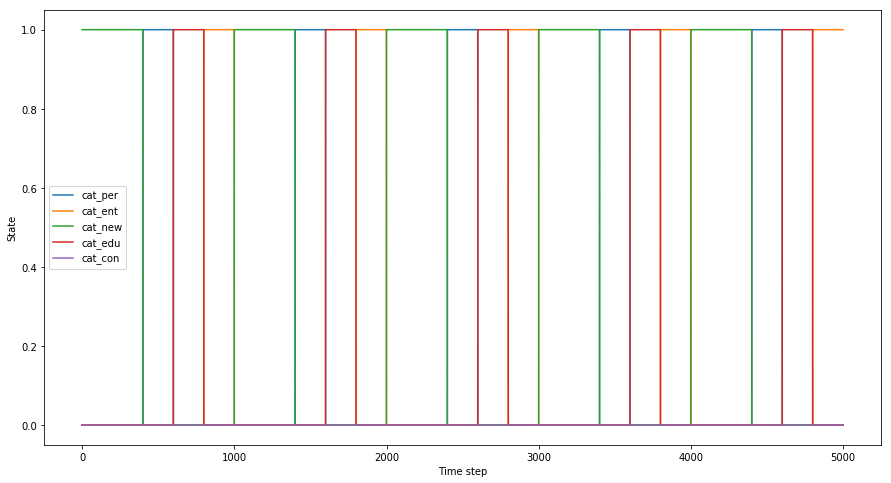

In [56]:
inputsDF[['cat_per', 'cat_ent', 'cat_new', 'cat_edu', 'cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Message characteristics

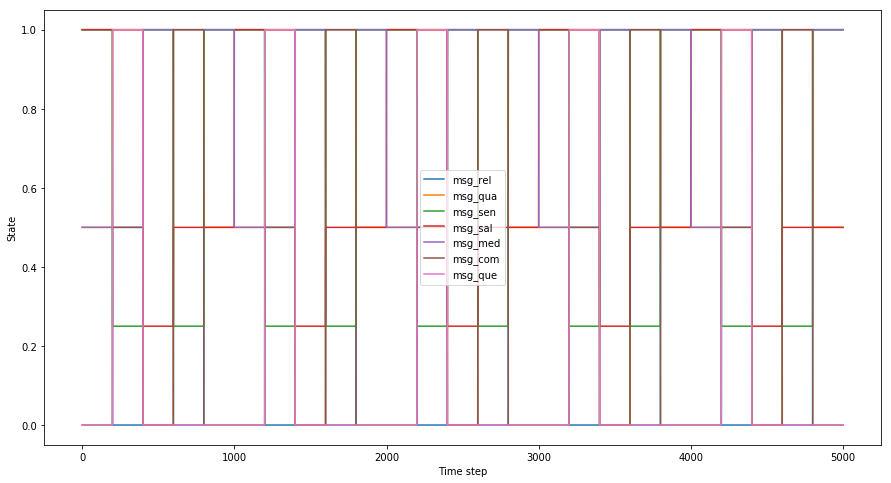

In [57]:
inputsDF[['msg_rel', 'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Sensory states

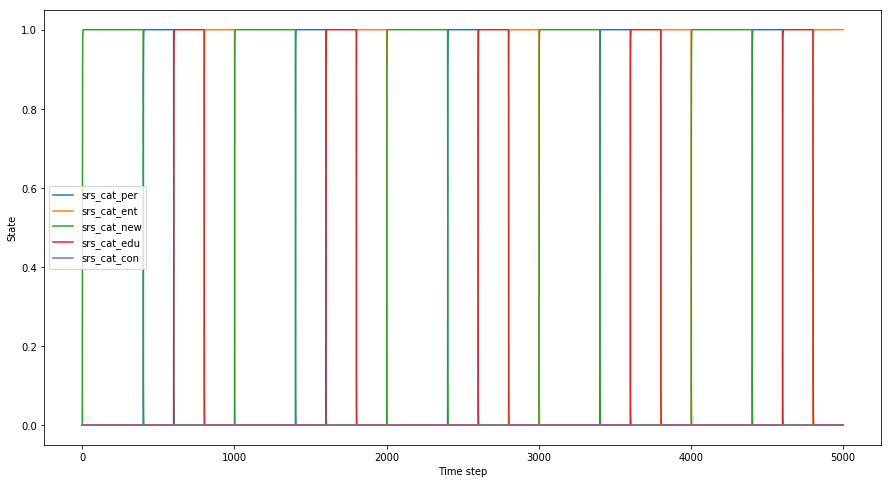

In [58]:
inputsDF[['srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu', 'srs_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Arousal, attention

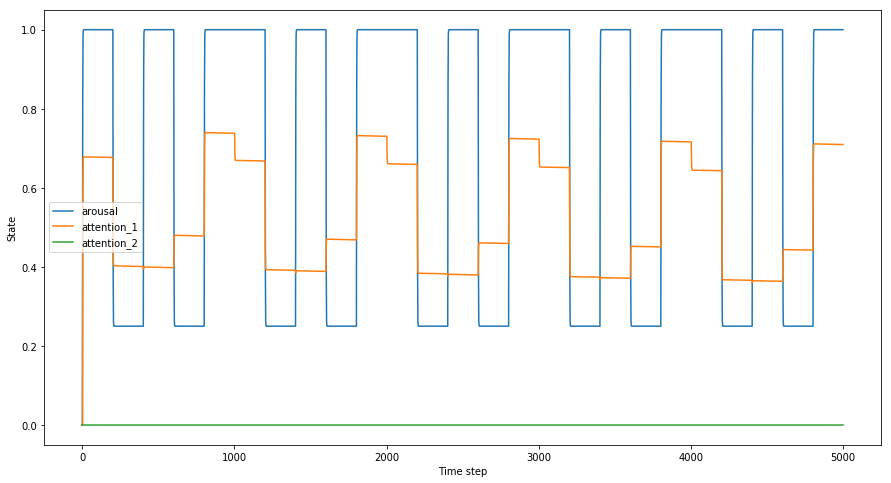

In [59]:
inputsDF[['arousal', 'attention_1', 'attention_2']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### FFs

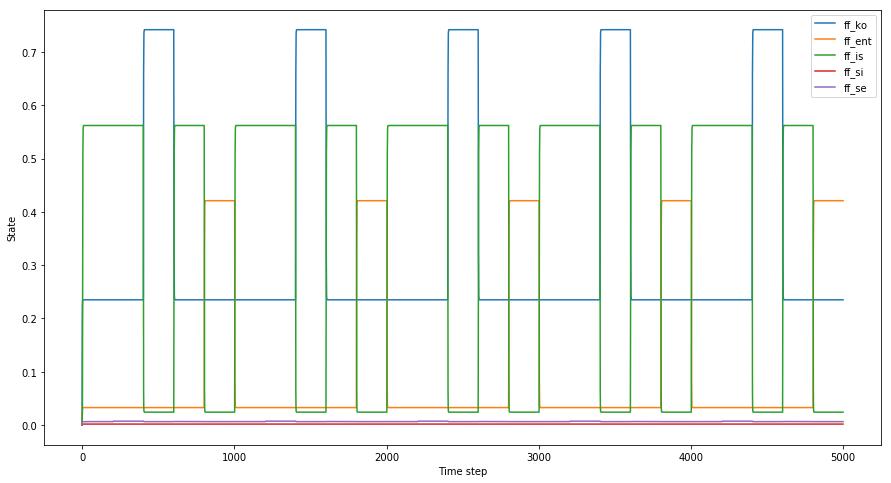

In [60]:
inputsDF[['ff_ko', 'ff_ent', 'ff_is', 'ff_si', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Satisfaction, dissatisfaction

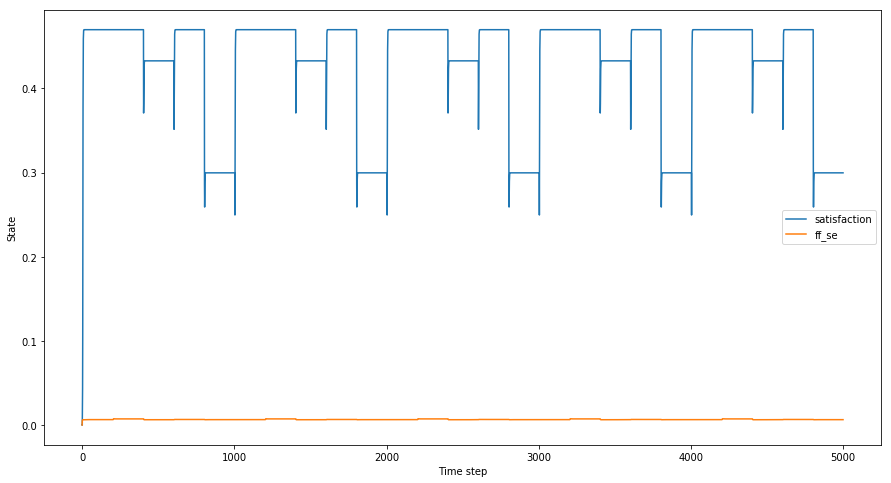

In [62]:
inputsDF[['satisfaction', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### preps and ssr's

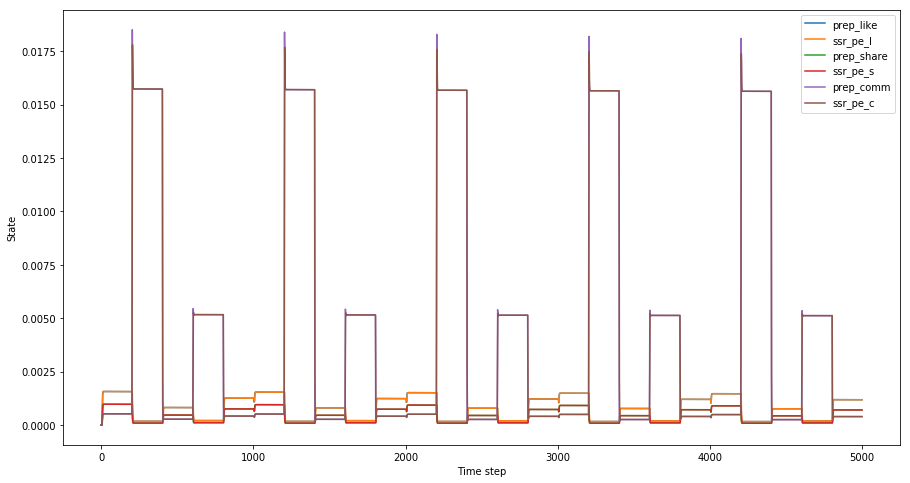

In [63]:
inputsDF[['prep_like', 'ssr_pe_l', 'prep_share', 'ssr_pe_s', 'prep_comm', 'ssr_pe_c']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Outputs

Text(0.5, 0, 'Time step')

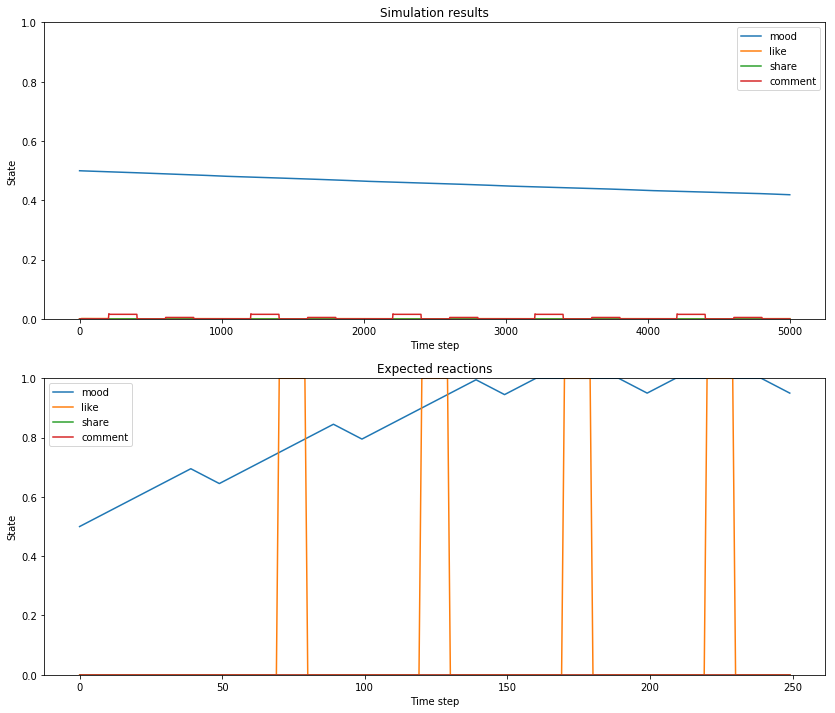

In [64]:
fig = plt.figure(figsize=((14,12)))

ax1 = fig.add_subplot(211)
inputsDF[['mood', 'like', 'share', 'comment']].plot(ax=ax1, title='Simulation results')
plt.ylabel('State')
plt.xlabel('Time step')
plt.ylim(0,1)

ax2 = fig.add_subplot(212)
reactions3[['mood', 'like', 'share', 'comment']].plot(ax=ax2, title='Expected reactions')
plt.ylim(0,1)
plt.ylabel('State')
plt.xlabel('Time step')

In [66]:
inputsDF.columns

Index(['cat_per', 'cat_ent', 'cat_new', 'cat_edu', 'cat_con', 'msg_rel',
       'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que',
       'nf_ko', 'nf_ent', 'nf_is', 'nf_si', 'nf_se', 'pt_cons', 'ss_cat_per',
       'ss_cat_ent', 'ss_cat_new', 'ss_cat_edu', 'ss_cat_con', 'ss_rel',
       'ss_qua', 'ss_sen', 'ss_sal', 'ss_med', 'ss_com', 'ss_que',
       'srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu',
       'srs_cat_con', 'srs_rel', 'srs_qua', 'srs_sen', 'srs_sal', 'srs_med',
       'srs_com', 'srs_que', 'arousal', 'attention_1', 'attention_2', 'mood',
       'ff_ko', 'ff_ent', 'ff_si', 'ff_is', 'ff_se', 'satisfaction',
       'prep_gen', 'prep_like', 'prep_comm', 'prep_share', 'ssr_pe_l',
       'ssr_pe_c', 'ssr_pe_s', 'like', 'comment', 'share'],
      dtype='object')